In [5]:
import pandas as pd
import os
#find data file path
CRASH_PATH = "/Users/Juan/Downloads/"
def load_crash_data(crash_path=CRASH_PATH):
    csv_path = os.path.join(crash_path, "crash.csv")
    return pd.read_csv(csv_path)

In [6]:
crash3 = load_crash_data()
crash3.head()
#load and verify csv data file

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,5/4/20,17:33,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4311815,Sedan,NaN,NaN,NaN,NaN
1,5/4/20,9:00,BROOKLYN,11212.0,40.656906,-73.92201,POINT (-73.92201 40.656906),NaN,NaN,364 EAST 92 STREET,...,NaN,NaN,NaN,NaN,4311771,Sedan,NaN,NaN,NaN,NaN
2,5/3/20,18:05,QUEENS,11415.0,NaN,NaN,NaN,NaN,NaN,120-77 QUEENS BOULEVARD,...,Unspecified,NaN,NaN,NaN,4311585,Sedan,NaN,NaN,NaN,NaN
3,5/3/20,22:10,NaN,NaN,40.819477,-73.92689,POINT (-73.92689 40.819477),GRAND CONCOURSE,NaN,NaN,...,NaN,NaN,NaN,NaN,4311546,Sedan,NaN,NaN,NaN,NaN
4,5/2/20,13:53,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4311332,Sedan,Sedan,NaN,NaN,NaN


In [7]:
crash3.info()
#describing the file's content just for informational purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28582 entries, 0 to 28581
Data columns (total 29 columns):
CRASH DATE                       28582 non-null object
CRASH TIME                       28582 non-null object
BOROUGH                          16996 non-null object
ZIP CODE                         16996 non-null float64
LATITUDE                         25104 non-null float64
LONGITUDE                        25104 non-null float64
LOCATION                         25104 non-null object
ON STREET NAME                   23267 non-null object
CROSS STREET NAME                14631 non-null object
OFF STREET NAME                  5315 non-null object
NUMBER OF PERSONS INJURED        28582 non-null int64
NUMBER OF PERSONS KILLED         28582 non-null int64
NUMBER OF PEDESTRIANS INJURED    28582 non-null int64
NUMBER OF PEDESTRIANS KILLED     28582 non-null int64
NUMBER OF CYCLIST INJURED        28582 non-null int64
NUMBER OF CYCLIST KILLED         28582 non-null int64
NUMBER OF MOTOR

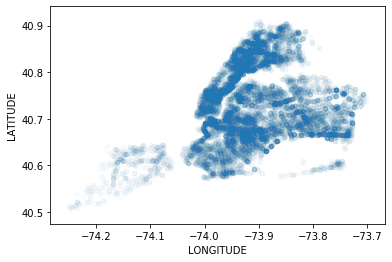

In [9]:
import matplotlib.pyplot as plt
crash3.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.02)
plt.show()
#scatter plot of the longitude and latitude data


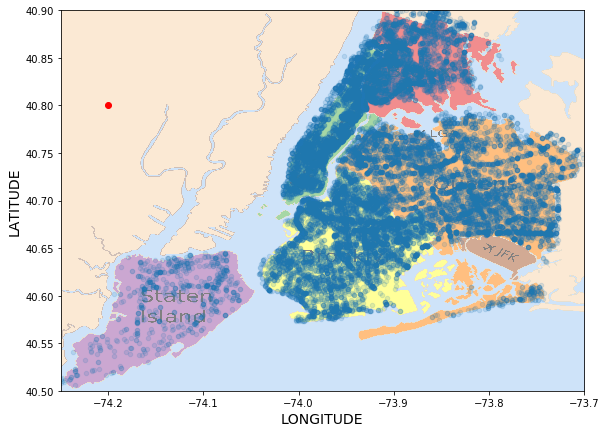

In [10]:


import numpy as np
import matplotlib.image as mpimg
#map image data path
ny_img=mpimg.imread('/Users/Juan/Downloads/ny.png')
ax = crash3.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",alpha=0.15, figsize=(10,7))
#custom point on map red
ax.plot(-74.2,40.8 , "or")                       
plt.imshow(ny_img, extent=[-74.25, -73.7, 40.5, 40.9], alpha=0.5)
plt.ylabel("LATITUDE", fontsize=14)
plt.xlabel("LONGITUDE", fontsize=14)
#scatter plot of the longitude and latitude data
plt.show()



In [11]:
from IPython.core.display import display, HTML, Markdown, clear_output
import ipywidgets as widgets

import numpy as np
import matplotlib.image as mpimg

button = widgets.Button(description='FIND')

latitude = widgets.Text(
            value='40.65',
            placeholder='Type latitude',
            description='Latitude:')

longitude = widgets.Text(
            value='-73.8',
            placeholder='Type longitude',
            description='Longitude:')

#creating a simple gui to introduce custom point value on the map
display(latitude,longitude)
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
        clear_output()
        ny_img=mpimg.imread('/Users/Juan/Downloads/ny.png')
         
        ax = crash3.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",alpha=0.15, figsize=(10,7))
        plt.imshow(ny_img, extent=[-74.25, -73.7, 40.5, 40.9], alpha=0.5)
        ax.plot(-73.8,40.65 , "or") 
        plt.ylabel("LATITUDE", fontsize=14)
        plt.xlabel("LONGITUDE", fontsize=14)

        plt.show()
         
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])




Text(value='40.65', description='Latitude:', placeholder='Type latitude')

Text(value='-73.8', description='Longitude:', placeholder='Type longitude')

In [12]:
import pandas as pd
from keplergl import KeplerGl
import geopandas as gpd
#find data file path
df = gpd.read_file("/Users/Juan/Downloads/crash.csv")
#load and verify csv data file
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,5/4/20,17:33,,,,,,BELT PARKWAY,,,...,,,,4311815,Sedan,,,,,None
1,5/4/20,9:00,BROOKLYN,11212,40.656906,-73.92201,POINT (-73.92201 40.656906),,,364 EAST 92 STREET,...,,,,4311771,Sedan,,,,,None
2,5/3/20,18:05,QUEENS,11415,,,,,,120-77 QUEENS BOULEVARD,...,,,,4311585,Sedan,,,,,None
3,5/3/20,22:10,,,40.819477,-73.92689,POINT (-73.92689 40.819477),GRAND CONCOURSE,,,...,,,,4311546,Sedan,,,,,None
4,5/2/20,13:53,,,,,,BRONX WHITESTONE BRIDGE,,,...,,,,4311332,Sedan,Sedan,,,,None


In [13]:
#Create a basemap 
map = KeplerGl(height=600, width=800)#show the map
map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=600)

In [14]:
with open('/Users/Juan/Downloads/crash.csv', 'r') as f:
    csvData = f.read()
map.add_data(data=csvData, name='Crashes NYC')
#load date points and locations into base map